In [1]:
# LOAD Packages 
!pip install uproot
import uproot
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib as mpl
from datetime import datetime
from proto_nd_flow.util.lut import LUT
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
import os
import math
import h5py
from matplotlib import cm, colors
import csv
import seaborn as sns
import sympy as smp
import sympy.stats
from scipy import stats,signal,ndimage,special,fft
from scipy.optimize import curve_fit
from scipy.integrate import quad
from mpl_toolkits.axes_grid1 import make_axes_locatable


Defaulting to user installation because normal site-packages is not writeable
Hello


In [10]:
# open file
file = '/global/cfs/cdirs/dune/www/data/2x2/simulation/jchakran_dev/MiniRun5_1E19_RHC.larnd.00123.20240507T185036Z.FLOW_Mod1_2Ch_Noise_ForSimCalib.hdf5'
#file = '/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.flow.beta1/FLOW/0001000/MiniRun5_1E19_RHC.flow.0001022.FLOW.hdf5'
#file = '/pscratch/sd/d/dunepr/output/MiniRun5/run-ndlar-flow/MiniRun5_1E19_RHC.flow/FLOW/0000000/MiniRun5_1E19_RHC.flow.0000259.FLOW.hdf5'
f = h5py.File(file, 'r')

#69 good, 102 okay,105 great
ev_id = 32#57#169#32 #106

events = f['charge/events/data']
hits_full = f['charge/calib_prompt_hits/data']
hits_ref = f['charge/events/ref/charge/calib_prompt_hits/ref']
hits_region = f['charge/events/ref/charge/calib_prompt_hits/ref_region']
geometry = f['geometry_info']

event = events[ev_id]
event_datetime = datetime.utcfromtimestamp(
        event['unix_ts']).strftime('%Y-%m-%d %H:%M:%S')
ev_id = event['id']
hit_ref = hits_ref[hits_region[ev_id,'start']:hits_region[ev_id,'stop']]
hit_ref = np.sort(hit_ref[hit_ref[:,0] == ev_id, 1])
hits = hits_full[hit_ref]
#print(hits)


norm = mpl.colors.LogNorm(vmin=min(hits['Q']),vmax=max(hits['Q']))
cmap = plt.cm.get_cmap('jet')
           
mcharge = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
print('Geometry:', list(geometry.keys()))
print('Geometry:', list(geometry.keys()))
#print('Cathode thickness:', geometry.attrs['cathode_thickness'])
#print('LAr Detector bounds:', geometry.attrs['lar_detector_bounds'])
#print('Max Drift Distance:', geometry.attrs['max_drift_distance'])
print('Module RO Bounds:', geometry.attrs['module_RO_bounds'])
#print('Det Bounds:', geometry['det_bounds/data'][0:])
#print('SiPM Abs. Position:', len(geometry['sipm_abs_pos/data'][:]))
#print('SiPM Rel. Position:', len(geometry['sipm_rel_pos/data'][:]))
#print('Detector IDs:', geometry['det_id/data'][:])
#print('Detector Rel Position:', len(geometry['det_rel_pos/data'][:]))
print(f['light'].keys())
light_events = f['light/events/data']
charge_light_ref = f['charge/events/ref/light/events/ref']
charge_light_region = f['charge/events/ref/light/events/ref_region']
print("Charge light region:", charge_light_region.dtype.names)
light_matches = charge_light_ref[charge_light_region[ev_id,'start']:charge_light_region[ev_id,'stop']]
print("Light matches:", light_matches)

light_matches = np.sort(light_matches[light_matches[:,0] == ev_id, 1])

light = light_events[light_matches]
print(len(light))
print(len(light_events))
light_idx = light[0][0]
levent = f['light/events/data'][light_matches]
light_wvfms = f['light/wvfm/data']
light_event_wvfm_ref = f['light/events/ref']['light/wvfm']['ref']
light_event_wvfm_region = f['light/events/ref']['light/wvfm']['ref_region']

light_wvfm_ref = light_event_wvfm_ref[light_event_wvfm_region[light_idx,'start']:light_event_wvfm_region[light_idx,'stop']]
light_wvfm_ref = np.sort(light_wvfm_ref[light_wvfm_ref[:,0] == light_idx, 1])
light_wvfms = light_wvfms[light_wvfm_ref]["samples"]

#Prepare color map for light
light_cmap=cm.afmhot
light_norm = colors.LogNorm(1,light_wvfms[0].sum(axis=-1).max()*100)
light_norm_single = colors.LogNorm(1,light_wvfms[0].sum(axis=-1).max())
print(light_wvfms[0].sum(axis=-1).max())
c = light_norm(light_wvfms[0].sum(axis=-1))
mlight = plt.cm.ScalarMappable(norm=light_norm, cmap=light_cmap)

sipm_abs_pos = LUT.from_array(f["geometry_info/sipm_abs_pos"].attrs["meta"],f["geometry_info/sipm_abs_pos/data"])
sipm_rel_pos = LUT.from_array(f["geometry_info/sipm_rel_pos"].attrs["meta"],f["geometry_info/sipm_rel_pos/data"])



/tmp/ipykernel_271868/1291915348.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


Geometry: ['anode_drift_coordinate', 'det_bounds', 'det_id', 'det_rel_pos', 'drift_dir', 'pixel_coordinates_2D', 'sipm_abs_pos', 'sipm_rel_pos', 'tile_id']
Geometry: ['anode_drift_coordinate', 'det_bounds', 'det_id', 'det_rel_pos', 'drift_dir', 'pixel_coordinates_2D', 'sipm_abs_pos', 'sipm_rel_pos', 'tile_id']
Module RO Bounds: [[[  3.06900001 -62.07600145   2.46200008]
  [ 63.93099976  62.07600145  64.53799944]]

 [[  3.06900001 -62.07600145 -64.53799944]
  [ 63.93099976  62.07600145  -2.46200008]]

 [[-63.93099976 -62.07599891   2.462     ]
  [ -3.06900001  62.07599891  64.5379969 ]]

 [[-63.93099976 -62.07600145 -64.53799944]
  [ -3.06900001  62.07600145  -2.46200008]]]
<KeysViewHDF5 ['events', 'sipm_hits', 'sum_hits', 't_ns', 'wvfm']>
Charge light region: ('start', 'stop')
Light matches: [[32 32]]
1
192
1627618


IO Group: 1 Count: 1468
IO Group: 2 Count: 259
IO Group: 3 Count: 567
IO Group: 6 Count: 19
IO Group: 8 Count: 1


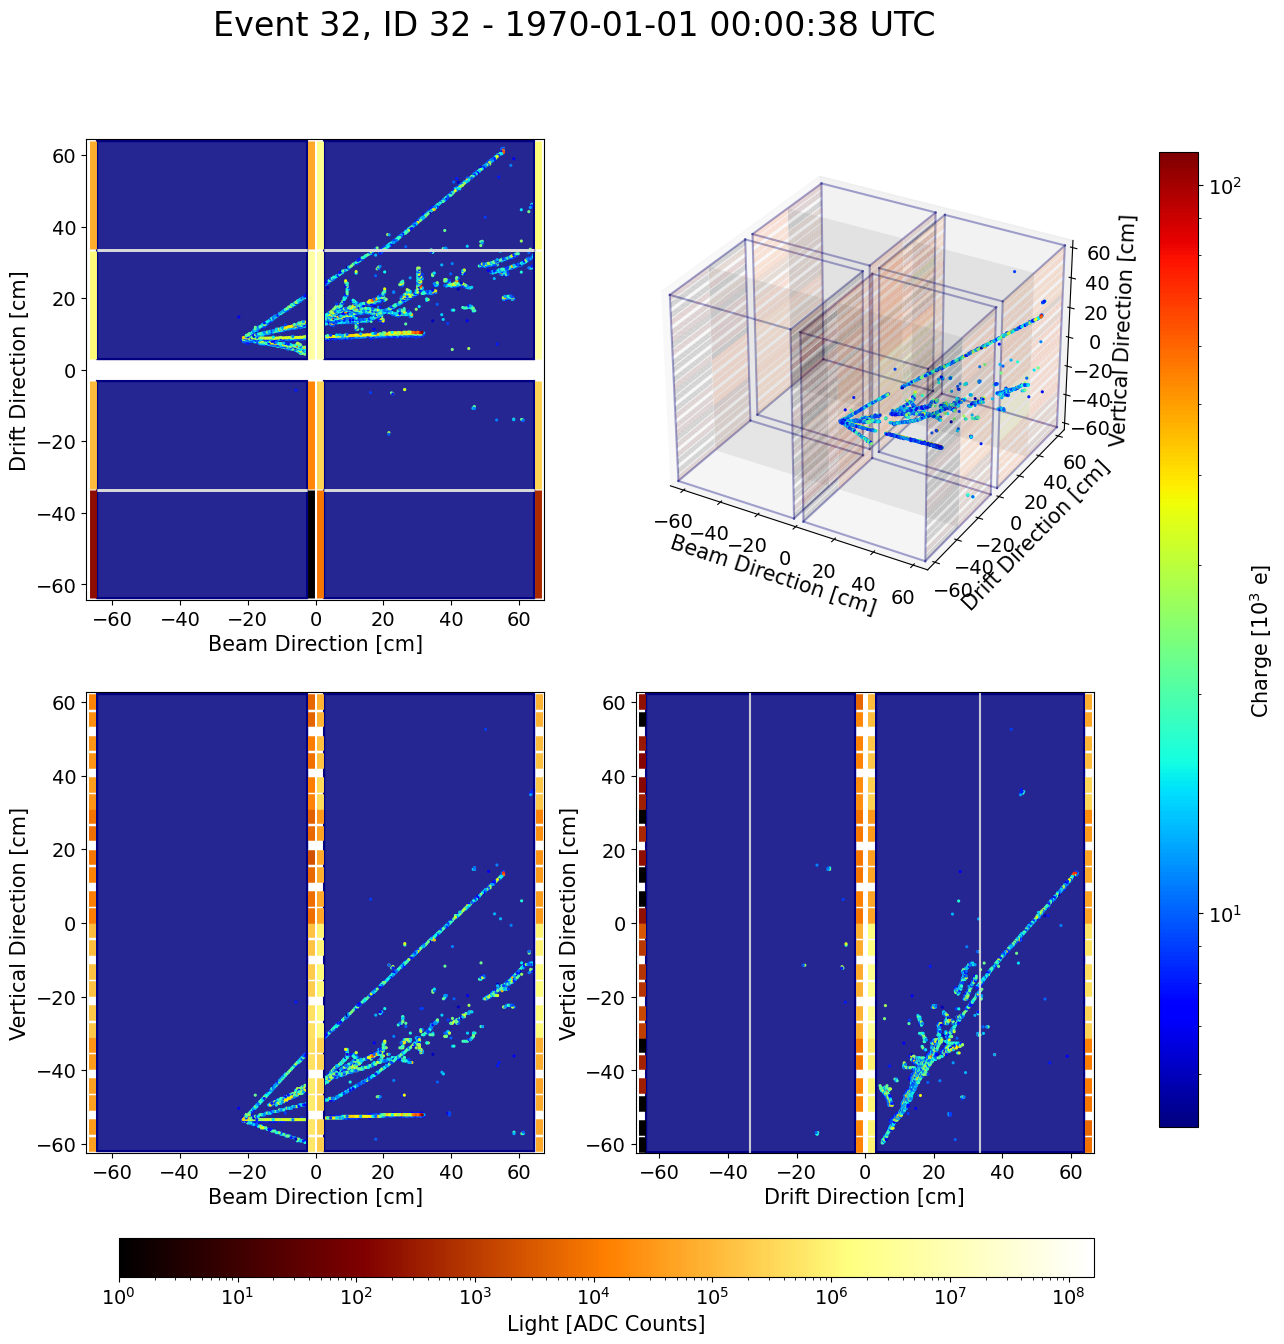

In [11]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(222, projection='3d')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar = fig.colorbar(mcharge, cax=cbar_ax, label=r'Charge [$10^3$ e]')
cbar.set_label(r'Charge [$10^3$ e]', size=15)
cbar_ax.tick_params(labelsize=14)

light_cbar_ax = fig.add_axes([0.15, 0.005, 0.75, 0.03])
light_cbar = fig.colorbar(mlight, cax=light_cbar_ax, label=r'Light [ADC Counts]', orientation = 'horizontal')
light_cbar.set_label(r'Light [ADC Counts]', size=15)
light_cbar_ax.tick_params(labelsize=14)

fig.suptitle("Event %i, ID %i - %s UTC" %
                          (ev_id, event['id'], event_datetime), size=24)

def make_x_plane(y1, y2, z1, z2, x):
    y = np.linspace(y1, y2, 100)
    z = np.linspace(z1, z2, 100)
    Y, Z = np.meshgrid(y, z)
    X = np.full(Y.shape, x)
    return X, Y, Z

def make_z_plane(x1, x2, y1, y2, z):
    x = np.linspace(x1, x2, 100)
    y = np.linspace(y1, y2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.full(X.shape, z)
    return X, Y, Z

ax.set_xlabel('Beam Direction [cm]', fontsize=15) #z
ax.set_ylabel('Drift Direction [cm]', fontsize=15) #x
ax.set_zlabel('Vertical Direction [cm]', fontsize=15) #y
ax.set_xlim(geometry.attrs['lar_detector_bounds'][0][2], geometry.attrs['lar_detector_bounds'][1][2])
ax.set_ylim(geometry.attrs['lar_detector_bounds'][0][0], geometry.attrs['lar_detector_bounds'][1][0])
ax.set_zlim(geometry.attrs['lar_detector_bounds'][0][1], geometry.attrs['lar_detector_bounds'][1][1])
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=14)


ax1.set_xlabel('Beam Direction [cm]', fontsize=15)
ax1.set_ylabel('Drift Direction [cm]', fontsize=15)
ax1.set_ylim(geometry.attrs['lar_detector_bounds'][0][0]-0.5, geometry.attrs['lar_detector_bounds'][1][0]+0.5)
ax1.set_xlim(geometry.attrs['lar_detector_bounds'][0][2]-3.15, geometry.attrs['lar_detector_bounds'][1][2]+3)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.set_xlabel('Beam Direction [cm]', fontsize=15)
ax2.set_ylabel('Vertical Direction [cm]', fontsize=15)
ax2.set_xlim(geometry.attrs['lar_detector_bounds'][0][2]-3.05, geometry.attrs['lar_detector_bounds'][1][2]+2.9)
ax2.set_ylim(geometry.attrs['lar_detector_bounds'][0][1]-0.5, geometry.attrs['lar_detector_bounds'][1][1]+0.5)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3.set_xlabel('Drift Direction [cm]', fontsize=15)
ax3.set_ylabel('Vertical Direction [cm]', fontsize=15)
ax3.set_xlim(geometry.attrs['lar_detector_bounds'][0][0]-2.95, geometry.attrs['lar_detector_bounds'][1][0]+2.8)
ax3.set_ylim(geometry.attrs['lar_detector_bounds'][0][1]-0.4, geometry.attrs['lar_detector_bounds'][1][1]+0.5)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Plot hits in 3D view first so that cathodes/anodes go over the hits
ax.scatter(hits['z'], hits['x'], hits['y'], lw=0, ec='C0', c=cmap(
                norm(hits['Q'])), s=5, alpha=1)

for i in range(len(geometry.attrs['module_RO_bounds'])):
    # Plot cathodes for XYZ (beam, drift, vertical) 3D view:
    X_cathode, Y_cathode, Z_cathode = make_x_plane(geometry.attrs['module_RO_bounds'][i][0][1], geometry.attrs['module_RO_bounds'][i][1][1], \
                                                    geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][1][2], 
                                                    geometry.attrs['module_RO_bounds'][i][0][0]+geometry.attrs['max_drift_distance']+geometry.attrs['cathode_thickness']/2)
    ax.plot_surface(Z_cathode,X_cathode,Y_cathode, color='gainsboro', alpha=0.1)

    for j in range(2):
        for k in range(2):
            # Plot outlines of modules for XYZ (beam, drift, vertical) 3D view:
            ax.plot([geometry.attrs['module_RO_bounds'][i][j][2], geometry.attrs['module_RO_bounds'][i][j][2]], \
                    [geometry.attrs['module_RO_bounds'][i][0][0], geometry.attrs['module_RO_bounds'][i][1][0]], \
                    [geometry.attrs['module_RO_bounds'][i][k][1], geometry.attrs['module_RO_bounds'][i][k][1]], color=cmap(0), alpha=0.35)
            
            ax.plot([geometry.attrs['module_RO_bounds'][i][j][2], geometry.attrs['module_RO_bounds'][i][j][2]], \
                    [geometry.attrs['module_RO_bounds'][i][k][0], geometry.attrs['module_RO_bounds'][i][k][0]], \
                    [geometry.attrs['module_RO_bounds'][i][0][1], geometry.attrs['module_RO_bounds'][i][1][1]], color=cmap(0), alpha=0.35)
            
            ax.plot([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
                    [geometry.attrs['module_RO_bounds'][i][j][0], geometry.attrs['module_RO_bounds'][i][j][0]], \
                    [geometry.attrs['module_RO_bounds'][i][k][1], geometry.attrs['module_RO_bounds'][i][k][1]], color=cmap(0), alpha=0.35)
        
        # Plot outlines of modules for ZX (beam, drift) projections:
        ax1.plot([geometry.attrs['module_RO_bounds'][i][j][2], geometry.attrs['module_RO_bounds'][i][j][2]], \
                 [geometry.attrs['module_RO_bounds'][i][0][0], geometry.attrs['module_RO_bounds'][i][1][0]],\
                 color=cmap(0), alpha=1)
        ax1.plot([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
                 [geometry.attrs['module_RO_bounds'][i][j][0], geometry.attrs['module_RO_bounds'][i][j][0]],\
                 color=cmap(0), alpha=1)
        
        # Only two modules represented in ZY and XY projections
        if i >= 2: continue

        # Plot outlines of modules for ZY (beam, vertical) projections:
        ax2.plot([geometry.attrs['module_RO_bounds'][i][j][2], geometry.attrs['module_RO_bounds'][i][j][2]], \
                 [geometry.attrs['module_RO_bounds'][i][0][1], geometry.attrs['module_RO_bounds'][i][1][1]],\
                 color=cmap(0), alpha=1)
        ax2.plot([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
                 [geometry.attrs['module_RO_bounds'][i][j][1], geometry.attrs['module_RO_bounds'][i][j][1]],\
                 color=cmap(0), alpha=1)
        
        # Plot outlines of modules for XY (drift, vertical) projections:
        # X footprints are the same for i=0 and i=1, but different for i=1 and i=2
        ax3.plot([geometry.attrs['module_RO_bounds'][i+1][j][0], geometry.attrs['module_RO_bounds'][i+1][j][0]], \
                 [geometry.attrs['module_RO_bounds'][i+1][0][1], geometry.attrs['module_RO_bounds'][i+1][1][1]],\
                 color=cmap(0), alpha=1)
        ax3.plot([geometry.attrs['module_RO_bounds'][i+1][0][0], geometry.attrs['module_RO_bounds'][i+1][1][0]], \
                 [geometry.attrs['module_RO_bounds'][i+1][j][1], geometry.attrs['module_RO_bounds'][i+1][j][1]],\
                 color=cmap(0), alpha=1)

        
    # Fill modules for ZX (beam, drift) projections:
    ax1.fill([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][0][2], \
              geometry.attrs['module_RO_bounds'][i][1][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
             [geometry.attrs['module_RO_bounds'][i][0][0], geometry.attrs['module_RO_bounds'][i][1][0], \
              geometry.attrs['module_RO_bounds'][i][1][0], geometry.attrs['module_RO_bounds'][i][0][0]],\
             color=cmap(0), alpha=0.85)

    # Only two modules represented in ZY and XY projections
    if i >= 2: continue

    # Fill modules for ZY (beam, vertical) projections:
    ax2.fill([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][0][2], \
              geometry.attrs['module_RO_bounds'][i][1][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
             [geometry.attrs['module_RO_bounds'][i][0][1], geometry.attrs['module_RO_bounds'][i][1][1], \
              geometry.attrs['module_RO_bounds'][i][1][1], geometry.attrs['module_RO_bounds'][i][0][1]],\
             color=cmap(0), alpha=0.85)
    
    # Fill modules for XY (drift, vertical) projections:
    ax3.fill([geometry.attrs['module_RO_bounds'][i+1][0][0], geometry.attrs['module_RO_bounds'][i+1][0][0], \
              geometry.attrs['module_RO_bounds'][i+1][1][0], geometry.attrs['module_RO_bounds'][i+1][1][0]], \
             [geometry.attrs['module_RO_bounds'][i+1][0][1], geometry.attrs['module_RO_bounds'][i+1][1][1], \
              geometry.attrs['module_RO_bounds'][i+1][1][1], geometry.attrs['module_RO_bounds'][i+1][0][1]],\
             color=cmap(0), alpha=0.85)
    
    # Plot cathodes for XY (drift, vertical) projections:
    ax3.plot([geometry.attrs['module_RO_bounds'][i+1][0][0]+geometry.attrs['max_drift_distance']+geometry.attrs['cathode_thickness']/2, \
              geometry.attrs['module_RO_bounds'][i+1][0][0]+geometry.attrs['max_drift_distance']+geometry.attrs['cathode_thickness']/2],\
             [geometry.attrs['module_RO_bounds'][i+1][0][1], geometry.attrs['module_RO_bounds'][i+1][1][1]], \
              color='gainsboro', alpha=0.9)

# Plot light
light_wvfm_sums = light_wvfms[0].sum(axis=-1)
all_sipm_pos = f["geometry_info/sipm_abs_pos/data"]["data"][1:]
sipm_unique_x = np.unique([pos[0] for pos in all_sipm_pos])
sipm_unique_z = np.unique([pos[2] for pos in all_sipm_pos])
sipm_unique_y = np.unique([pos[1] for pos in all_sipm_pos])

# temporary fix for bug in light geometry LUTs
def convert_light_x(light_lut_idx1, light_lut_idx2, light_x):

    rel_pos = sipm_rel_pos[(light_lut_idx1, light_lut_idx2)][0]
    if rel_pos[0]%2 == 0:
        light_x_true = light_x - (4*15.215)
    elif rel_pos[0]%2 == 1:
        light_x_true = light_x + (4*15.215)

    return light_x_true

# Plot light in XZ projection
for x,z in itertools.product(sipm_unique_x,sipm_unique_z):
    if x==-1: continue
    if z==-1: continue
    this_xz_sum = 0
    for i,j in itertools.product(range(light_wvfms[0].shape[0]),range(light_wvfms[0].shape[1])):
        #if i!=0: continue
        pos=sipm_abs_pos[(i,j)][0]
        rel_pos = sipm_rel_pos[(i,j)][0]
        if pos[0]==-1:
            continue
        true_x = convert_light_x(i,j,pos[0])
        #print("True x:", true_x, "Pos[0]:", pos[0])
        if (abs(true_x-x) < 0.5) and (pos[2]==z):
            this_xz_sum += light_wvfms[0][i,j].sum()
            #print("SIPM:",i,j,"Abs pos:",pos,"Rel pos:",rel_pos,"Light sum:",light_wvfms[0][i,j].sum())
    for i in range(len(geometry.attrs['module_RO_bounds'])):
        for j in range(2):
            #if count != chosen_count: continue
            z_offset = ((-1)**(j+1))*1.25
            if (abs(z-geometry.attrs['module_RO_bounds'][i][j][2]) < 1):
                if this_xz_sum==0:
                    cmap_value = light_cmap(0)
                else:
                    cmap_value = light_cmap(light_norm(this_xz_sum))
                if (abs(x-geometry.attrs['module_RO_bounds'][i][0][0]) < 1):
                    ax1.plot([geometry.attrs['module_RO_bounds'][i][j][2]+z_offset, geometry.attrs['module_RO_bounds'][i][j][2]+z_offset], \
                             [geometry.attrs['module_RO_bounds'][i][0][0], geometry.attrs['module_RO_bounds'][i][0][0]+geometry.attrs['max_drift_distance']],\
                              color=cmap_value, alpha=1, linewidth=5, solid_capstyle='butt')
                elif (abs(x-geometry.attrs['module_RO_bounds'][i][1][0]) < 1):
                    ax1.plot([geometry.attrs['module_RO_bounds'][i][j][2]+z_offset, geometry.attrs['module_RO_bounds'][i][j][2]+z_offset], \
                             [geometry.attrs['module_RO_bounds'][i][1][0]-geometry.attrs['max_drift_distance'], geometry.attrs['module_RO_bounds'][i][1][0]] ,\
                              color=cmap_value, alpha=1, linewidth=5, solid_capstyle='butt')

# Plot cathodes for ZX (beam, drift) projections:
for i in range(len(geometry.attrs['module_RO_bounds'])):
    for j in range(2):
        ax1.plot([geometry.attrs['module_RO_bounds'][i][0][2], geometry.attrs['module_RO_bounds'][i][1][2]], \
                 [geometry.attrs['module_RO_bounds'][i][0][0]+geometry.attrs['max_drift_distance']+geometry.attrs['cathode_thickness']/2, \
                  geometry.attrs['module_RO_bounds'][i][0][0]+geometry.attrs['max_drift_distance']+geometry.attrs['cathode_thickness']/2],\
                  color='gainsboro', alpha=0.9, linewidth=2,solid_capstyle='butt')

# Plot light in ZY projection
for z,y in itertools.product(sipm_unique_z,sipm_unique_y):
    if z==-1: continue
    if y==-1: continue
    this_zy_sum = 0
    for i,j in itertools.product(range(light_wvfms[0].shape[0]),range(light_wvfms[0].shape[1])):
        pos=sipm_abs_pos[(i,j)][0]
        if pos[0]==-1:
            continue
        if (pos[2]==z) and (pos[1]==y):
            this_zy_sum += light_wvfms[0][i,j].sum()
    for i in range(len(geometry.attrs['module_RO_bounds'])):
        for j in range(2):
            z_offset = ((-1)**(j+1))*1.25
            if this_zy_sum==0:
                cmap_value = light_cmap(0)
            else:
                cmap_value = light_cmap(light_norm(this_zy_sum))
            if (abs(z-geometry.attrs['module_RO_bounds'][i][j][2]) < 1):
                ax2.plot([geometry.attrs['module_RO_bounds'][i][j][2]+z_offset, geometry.attrs['module_RO_bounds'][i][j][2]+z_offset], \
                         [y-2, y+2],color=cmap_value, alpha=1, linewidth=5, solid_capstyle='butt')
                
# Plot light in XY projection               
for x,y in itertools.product(sipm_unique_x,sipm_unique_y):
    if x==-1: continue
    if y==-1: continue
    this_xy_sum = 0
    for i,j in itertools.product(range(light_wvfms[0].shape[0]),range(light_wvfms[0].shape[1])):
        pos=sipm_abs_pos[(i,j)][0]
        if pos[0]==-1:
            continue
        true_x = convert_light_x(i,j,pos[0])
        if (abs(true_x-x) < 0.5) and (pos[1]==y):
            this_xy_sum += light_wvfms[0][i,j].sum()
    for i in range(len(geometry.attrs['module_RO_bounds'])):
        for j in range(2):
            x_offset = ((-1)**(j+1))*1.25
            if this_xy_sum==0:
                cmap_value = light_cmap(0)
            else:
                cmap_value = light_cmap(light_norm(this_xy_sum))
            if (abs(x-geometry.attrs['module_RO_bounds'][i][j][0]) < 1):
                ax3.plot([geometry.attrs['module_RO_bounds'][i][j][0]+x_offset, geometry.attrs['module_RO_bounds'][i][j][0]+x_offset], \
                         [y-2, y+2],color=cmap_value, alpha=1, linewidth=5, solid_capstyle='butt')

# Plot light for XYZ (beam, drift, vertical) 3D view: 
for i,j in itertools.product(range(light_wvfms[0].shape[0]),range(light_wvfms[0].shape[1])):
    pos=sipm_abs_pos[(i,j)][0]
    if pos[0]==-1:
        continue
    this_xyz_sum = light_wvfms[0][i,j].sum()
    if this_xyz_sum==0:
        cmap_value = light_cmap(0)
        #print("Zero light sum at:", pos)
    else:
        cmap_value = light_cmap(light_norm(this_xyz_sum))
    z_diffs = [abs(pos[2]-geometry.attrs['module_RO_bounds'][k][l][2]) for k,l in itertools.product(range(len(geometry.attrs['module_RO_bounds'])),range(2))]
    z_diffs = np.reshape(z_diffs, np.shape(geometry.attrs['module_RO_bounds'][:,:,2]))
    min_z_diff = np.where(abs(z_diffs)<1)
    z_pos = geometry.attrs['module_RO_bounds'][:,:,2][min_z_diff][0]
    #print("Z pos:", z_pos)
    true_x = convert_light_x(i,j,pos[0])
    found_x = 0
    for k in range(len(geometry.attrs['module_RO_bounds'])):
        if (abs(true_x-geometry.attrs['module_RO_bounds'][k][0][0]) < 1):
            x1 = geometry.attrs['module_RO_bounds'][k][0][0]
            x2 = geometry.attrs['module_RO_bounds'][k][0][0]+geometry.attrs['max_drift_distance']
            found_x = 1
        elif (abs(true_x-geometry.attrs['module_RO_bounds'][k][1][0]) < 1):
            x1 = geometry.attrs['module_RO_bounds'][k][1][0]-geometry.attrs['max_drift_distance']
            x2 = geometry.attrs['module_RO_bounds'][k][1][0]
            found_x = 1
        if found_x ==1:
            light_x, light_y, light_z = make_z_plane(x1,x2, pos[1]-2, pos[1]+2,z_pos)
            ax.plot_surface(light_z,light_x,light_y,color=cmap_value, alpha=0.15, shade=False)
            #print("Light sum at:", pos, "is", this_xyz_sum)
            break
        else: continue
    

#ax.scatter(hits['z'], hits['x'], hits['y'], lw=0, ec='C0', c=cmap(
#                norm(hits['Q'])), s=5, alpha=1)
ax1.scatter(hits['z'], hits['x'], lw=0, ec='C0', c=cmap(
                norm(hits['Q'])), s=5, alpha=1)
ax2.scatter(hits['z'], hits['y'], lw=0, ec='C0', c=cmap(
                norm(hits['Q'])), s=5, alpha=1)
ax3.scatter(hits['x'], hits['y'], lw=0, ec='C0', c=cmap(
                norm(hits['Q'])), s=5, alpha=1)

hits_io_group_values, hits_io_group_counts = np.unique(hits['io_group'], return_counts=True)
for i in range(len(hits_io_group_counts)):
    print("IO Group:", hits_io_group_values[i], "Count:", hits_io_group_counts[i])

#ax.legend(loc='upper left')
#plt.tight_layout()
plt.show()
#plt.savefig('/exp/dune/app/users/ehinkle/nd_analysis/2x2_CAFs/reco_studies/track_'+str(track_number)+'_true_vs_reco_abs_cos_rot_angle_difference_with_ovlp_cut_'+str(ovlp_cut)+'.png')


In [ ]:
single_muon_events = 1504760591
mult_muon_events = np.array([7818369, 661884,118389, 24617,4749,804,112,1,1])
livetime = 55290000
mult_muon_rate = np.sum(mult_muon_events)/livetime #https://journals.aps.org/prd/pdf/10.1103/PhysRevD.99.122004
single_muon_rate = single_muon_events/livetime
nova_av = 3.9*3.9*(12.75+2.85)# m^3
nova_nd_top_area = nova_av/3.9 # m^2
proto_ndlar_av = 0.7*0.7*1.4*4 # m^3
proto_ndlar_top_area = proto_ndlar_av/1.4 # m^2
print("Single Muon Rate in NOvA ND:", single_muon_rate)
print("Multiple Muon Rate in NOvA ND:", mult_muon_rate)
#print("Single Muon Rate in ProtoDUNE ND-LAr (convert w/ AV):", single_muon_rate*(proto_ndlar_av/nova_av))
#print("Multiple Muon Rate in ProtoDUNE ND-LAr (convert w/ AV):", mult_muon_rate*(proto_ndlar_av/nova_av))
print("Single Muon Rate in ProtoDUNE ND-LAr (convert w/ Top Area):", single_muon_rate*(proto_ndlar_top_area/nova_nd_top_area))
print("Multiple Muon Rate in ProtoDUNE ND-LAr (convert w/ Top Area):", mult_muon_rate*(proto_ndlar_top_area/nova_nd_top_area))

print("Muon rate in NOvA FD:", (10*1000000000) / (24*60*60))
nova_fd_muon_rate = (10*1000000000) / (24*60*60) #https://nusoft.fnal.gov/nova/datacheck/nearline/plots/FarDet-t02-P1nSliceperSRDay.png
# I think that number is a scaling up of this plot https://nusoft.fnal.gov/nova/datacheck/nearline/plots/FarDet-t02-P1nSliceperSRDay.png   which is we see ~70 events in 500 us
nova_fd_muon_rate_better = 70/(500*10**-6) #Hz
print("Muon rate in NOvA FD (better):", nova_fd_muon_rate_better)
print("Muon rate in NOvA FD for 1 day:", nova_fd_muon_rate_better*24*60*60)
print("Muon rate in NOvA FD:", nova_fd_muon_rate)
nova_fd_top_area = 15.5*59.8
print("NOvA FD Top Area to NOvA ND Top Area:", nova_fd_top_area/(nova_nd_top_area)) # ratio should be ~15
single_module_top_area = proto_ndlar_top_area/4
print("Muon rate in Single Module (based on NOvA FD rate):", nova_fd_muon_rate*(single_module_top_area/nova_fd_top_area), "OR", nova_fd_muon_rate_better*(single_module_top_area/nova_fd_top_area))


minos_nd_muon_rate = 12.2458 #Hz, avg https://journals.aps.org/prd/pdf/10.1103/PhysRevD.90.012010
minos_nd_top_area = 4.8*16.6 # m^2
print("Muon rate in ProtoDUNE ND-LAr (convert w/ MINOS ND Top Area):", single_muon_rate*(proto_ndlar_top_area/minos_nd_top_area))
unnamed_collab_muon_rate = .9560*100 #https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/92JA02672 m^-2 s^-1 sr^-1
radius_earth = 6366707.0195 #m
bern_elevation = 540 #m
bern_sqm_per_sr = (radius_earth+bern_elevation)**2 # m^2 / sr
bern_muon_rate_with_sr_conv = unnamed_collab_muon_rate/bern_sqm_per_sr*single_module_top_area #m^-2 s^-1
bern_muon_rate_no_sr_conv = unnamed_collab_muon_rate*single_module_top_area #sr^-1 s^-1
print("Muon rate in Single Module (based on unnamed collab rate w/o sr conversion):", bern_muon_rate_no_sr_conv)
print("Muon rate in Single Module (based on unnamed collab rate w/ sr conversion):", bern_muon_rate_with_sr_conv)



Single Muon Rate in NOvA ND: 27.21578207632483
Multiple Muon Rate in NOvA ND: 0.15606666666666666
Single Muon Rate in ProtoDUNE ND-LAr (convert w/ Top Area): 0.8767740445364345
Multiple Muon Rate in ProtoDUNE ND-LAr (convert w/ Top Area): 0.005027788735481043
Muon rate in NOvA FD: 115740.74074074074
Muon rate in NOvA FD (better): 140000.0
Muon rate in NOvA FD for 1 day: 12096000000.0
Muon rate in NOvA FD: 115740.74074074074
NOvA FD Top Area to NOvA ND Top Area: 15.235042735042736
Muon rate in Single Module (based on NOvA FD rate): 61.18563271438446 OR 74.01014133131945
Muon rate in ProtoDUNE ND-LAr (convert w/ MINOS ND Top Area): 0.6694645189457412
Muon rate in Single Module (based on unnamed collab rate w/o sr conversion): 46.843999999999994
Muon rate in Single Module (based on unnamed collab rate w/ sr conversion): 1.1554484510557561e-12


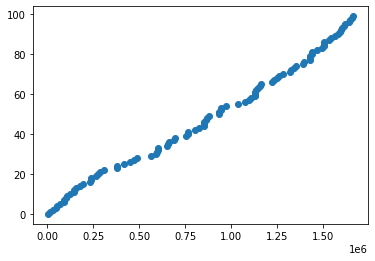

In [ ]:
# test generating event times
EVENT_RATE = 16667  # 60 Hz
def gen_event_times(nevents, t0):
    """
    Generate sequential event times assuming events are uncorrelated

    Args:
        nevents(int): number of event times to generate
        t0(int): offset to apply [microseconds]

    Returns:
        array: shape `(nevents,)`, sequential event times [microseconds]
    """
    event_start_time = np.random.exponential(scale=EVENT_RATE, size=int(nevents))
    event_start_time = np.cumsum(event_start_time)
    event_start_time += t0

    return event_start_time

event_times = gen_event_times(100, 0)

plt.plot(event_times, np.arange(len(event_times)), 'o')